Hospital data preprocessing for severity prognosis study in COVID-19

Autors: Maria Gabriela Valeriano, Ana Carolina Lorena, Carlos Kiffer

Source: Hospital Beneficência Portuguesa, made available by FAPESP through COVID-19 Data Sharing/BR-USP. The original data is available at https://repositoriodatasharingfapesp.uspdigital.usp.br/

The data is divided in three files: Pacients, Tests and Outcomes. Each patient has an id and each patient hospital visit receive an new id_attendance as identification. 

In the file tests, there are some cases when the same test have similar but divergent label. This cases were resolved with the help of an expert. The file 'bpsp_exames_01_labels.csv' have this issues corrected. 


In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#file: Pacientes

#read the file
patients <- read.csv("bpsp_pacientes_01.csv", sep = "|", stringsAsFactors = FALSE)

#dimensions
patients %>% dim

#check for repeated lines 
patients %>% unique %>% dim


[1] 39000     7

[1] 39000     7

In [3]:
#rename columns
names(patients) <- c('id', 'sex', 'birth_year', 'country', 'state', 'city', 'zip_code')

#number of patients
patients %>% select(id) %>% unique %>% nrow

[1] 39000

In [4]:
#file: Tests

#read file
tests <- read.csv("bpsp_exames_01_labels.csv", stringsAsFactors = FALSE)

#dimensions
tests %>% dim

#check for repeated lines 
tests %>% unique %>% dim

#remove repeated lines 
tests %>% unique -> tests

#number of patients 
tests %>% select(id) %>% unique %>% dim



[1] 5339293      10

[1] 5229119      10

[1] 33800     1

In [5]:
#convert commas -> dots
tests <- data.frame(lapply(tests, function(x) {gsub(",", ".", x)}))


In [6]:
#rename columns
names(tests) <- c('id', 'id_attendance', 'test_date', 'place', 'result', 'measurement_unit', 'normal_value', 'test', 'analyte', 'test_analyte')

#number of id_attendance 
tests %>% select(id_attendance) %>% unique %>% dim

[1] 76506     1

In [7]:
#file: Outcomes

#read the file
outcomes <- read.csv("bpsp_desfecho_01.csv", sep = "|", stringsAsFactors = FALSE) 

#dimensions
outcomes %>% dim

#check for repeated lines 
outcomes %>% unique %>% dim

[1] 217991      8

[1] 217991      8

In [8]:
#rename columns 'clinic', 'result', 'measurement_unit', 'normal_value', 'test', 'analyte', 'test_analyte'
names(outcomes) <- c('id', 'id_attendance', 'attendance_date', 'attendance_type', 'id_clinic', 'clinic', 'outcome_date','outcome_patient')

#number of patients and attendances
outcomes %>% select(id) %>% unique %>% dim
outcomes %>% select(id_attendance) %>% unique %>% dim

[1] 39001     1

[1] 217991      1

In [9]:
#when outcome_patient == death, it does not have outcome_date 
#this issue is due to the criteria adopted for anonymization by the institution that provided the data

outcomes %>% 
filter(str_detect(outcome_patient, 'Obito')) %>%  
count(outcome_date)


outcome_date,n
<chr>,<int>
DDMMAA,834


In [10]:
#check the birth_year
patients %>% count(birth_year)

#when birth year == AAAA the year of birth is equal to or before 1930 
#information given by institution that provided the data
patients$birth_year[patients$birth_year == 'AAAA'] <- '1930'

#check the transformation
patients %>% count(birth_year)

birth_year,n
<chr>,<int>
1931,17
1932,30
1933,27
1934,42
1935,42
1936,40
1937,46
1938,37
1939,42


birth_year,n
<chr>,<int>
1930,107
1931,17
1932,30
1933,27
1934,42
1935,42
1936,40
1937,46
1938,37


In [11]:
#transform the colums outcome_date, attendance_date and test_date to date format
outcomes$outcome_date <- as.Date(outcomes$outcome_date, format="%d/%m/%Y")
outcomes$attendance_date<- as.Date(outcomes$attendance_date, format="%d/%m/%Y")
tests$test_date <- as.Date(tests$test_date, format="%d/%m/%Y")

#dimensions
outcomes %>% dim

#create a new column with the number of days between the first attendance and the outcome 
outcomes %>% mutate(outcome_days = (difftime(outcomes$outcome_date, outcomes$attendance_date, unit = "days"))) -> outcomes
outcomes$outcome_days <- as.integer(outcomes$outcome_days)


[1] 217991      8

In [12]:
#check attendance_date
outcomes %>% count(attendance_date)

attendance_date,n
<date>,<int>
2015-09-08,1
2015-09-10,1
2015-09-14,1
2016-12-01,1
2017-01-06,1
2017-01-26,1
2017-02-01,1
2017-02-13,1
2017-02-14,1


In [13]:
#join patients, tests and outcomes
tests %>% left_join(patients) -> tests
tests %>% left_join(outcomes) -> tests

#check how many patients (ids) and attendances (id_attendance) 
tests %>% select(id) %>% unique %>% dim
tests %>% select(id_attendance) %>% unique %>% dim

#create a new column with the number of days between the first attendance and the test
tests %>% mutate(test_days = (difftime(tests$test_date, tests$attendance_date,  unit = "days"))) -> tests
tests$test_days <- as.integer(tests$test_days)

#dimensions
tests %>% dim

Joining, by = "id"

Joining, by = c("id", "id_attendance")



[1] 33800     1

[1] 76506     1

[1] 5229119      24

In [14]:
#filter 1 - patients who confirmed covid by crp test up to 15 days after attendance

#check 'covid' in the column test
tests %>% 
filter (str_detect(test, "covid")) %>% 
count(test)

test,n
<chr>,<int>
coronavirus covid19,33965
coronavirus covid19 coalizao vi inativo,41
coronavirus covid19 pre cirurgico,6258


In [15]:
#filter 'covid' in test column
tests %>% 
filter (str_detect(test,"covid") & !str_detect(test,"inativo")) %>% 
count(test)

tests %>% 
filter (str_detect(test, "covid") & !str_detect(test, "inativo")) -> test_covid

test,n
<chr>,<int>
coronavirus covid19,33965
coronavirus covid19 pre cirurgico,6258


In [16]:
#check analyte for these tests, only the first is an analyte of interest 
test_covid %>% count(analyte)

#filter the analyte of interest
test_covid %>% filter (str_detect(analyte, "2019"))  %>% count(analyte)
test_covid %>% filter (str_detect(analyte, "2019"))  -> test_covid

analyte,n
<chr>,<int>
coronavirus 2019ncov,33960
covid 19 cultura,5
covid 19 deteccao por pcr,6258


analyte,n
<chr>,<int>
coronavirus 2019ncov,33960


In [17]:
#check which are the possible results
test_covid %>% count(result)

result,n
<chr>,<int>
DETECTADO,993
DETECTADO (POSITIVO),6140
DETECTAVEL,15
Inconclusivo,11
INCONCLUSIVO,34
Inconclusivo,8
INDETECTAVEL,198
NAO DETECTADO,2206
NAO DETECTADO (NEGATIVO),24355


In [18]:
#filter the positive cases
test_covid %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NAO")) %>% count(result)
test_covid %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NAO")) -> test_covid_positive

result,n
<chr>,<int>
DETECTADO,993
DETECTADO (POSITIVO),6140


In [19]:
#between the positive cases, filter only that comfirmet up to 15 days after attendance 
test_covid_positive %>% filter(test_days < 16) -> test_covid_positive

#check the filter
test_covid_positive %>% count(test_days)

test_days,n
<int>,<int>
0,6411
1,454
2,84
3,27
4,8
5,7
6,9
7,5
8,5


In [20]:
#select the id_attendance of patients who confirmed up to 15 days
test_covid_positive %>%
select(id_attendance) %>% unique -> id_positive

#number of id_attendance
id_positive %>% tally

#filter tests from these patients
tests %>% filter(id_attendance %in% id_positive$id_attendance) -> tests

#number of tests
tests %>% dim

n
<int>
7022


[1] 552294     24

In [21]:
#number of ids and attendances
tests %>% select(id) %>% unique %>% dim
tests %>% select(id_attendance) %>% unique %>% dim

[1] 6786    1

[1] 7022    1

In [22]:
#filter 2 - tests collect up to 4 days after attendance
tests %>% filter(test_days == "0" | test_days == "1" | test_days == "2" | test_days == "3" | test_days == "4") -> tests

#check the filter
tests %>% count(test_days)

test_days,n
<int>,<int>
0,91784
1,29838
2,27986
3,25790
4,24763


In [23]:
#number of id and id_attendance
tests %>% select(id_attendance) %>% unique() %>% dim
tests %>% select(id) %>% unique() %>% dim

#dimensions
tests %>% dim

[1] 7021    1

[1] 6786    1

[1] 200161     24

In [24]:
#filter 3 
#some tests were realized more than once whithin the same id_attendance, keep just the first value 
tests %>% group_by(id_attendance,  test_analyte) %>% arrange((test_days)) %>% slice(1) %>% ungroup -> data

#dimensions
data %>% dim 

[1] 114718     24

In [25]:
#how many lines with hospitalization > 9
data %>% filter(outcome_days > 9) %>% dim

[1] 15757    24

In [26]:
#check outcome_patients
data %>% count(outcome_patient)

outcome_patient,n
<chr>,<int>
Alta a pedido,401
Alta Administrativa,5793
Alta ambulatorial/externo,694
Alta Cancelamento Atendimento,88
Alta curado,738
Alta da Mae/Puerpera e do Recem- Nascido,71
Alta do Pronto Atendimento,47229
Alta Internacao,2229
Alta Internacao BP,11321


In [27]:
death_1 <- 0
death_2 <- 0
death_3 <- 0
death_4 <- 0
hospitalized <- 0

#create a new column 'severity'
data %>% mutate(severity = 0) -> data

for (i in (1:nrow(data))){ #run through the entire file 
  days <- data$outcome_days[i]
  outcome <- data$outcome_patient[i]

  #if the patient was hospitalized for more than 9 days
  if (data$attendance_type[i] == "Internado" & !(is.na(days)) & days > 9){ 
   data$severity[i] <- 1
   hospitalized = hospitalized+1
   }
  
  #if death1
  if (!(is.na(outcome)) &
      outcome == "Obito com declaracao fornecida pelo medico assistente Maior que 24 Horas de inte")
  {   data$severity[i] <- 1 
      death_1 = death_1+1}

  #if death2
  if (!(is.na(outcome)) &
      outcome == "Obito com declaracao fornecida pelo- IML Maior que 24 Horas de internacao")
  {   data$severity[i] <- 1 
      death_2 = death_2+1}

  #if death3
  if (!(is.na(outcome)) &
      outcome == "Obito com declaracao fornecida pelo- SVO Maior que 24 Horas de internacao")
  {   data$severity[i] <- 1 
      death_3 = death_3+1}
    
  #if death4    
  if (!(is.na(outcome)) &
      outcome == "Obito com declaracao fornecida pelo medico assistente Menor que 24 Horas de inte")
  {   data$severity[i] <- 1 
      death_4 = death_4+1}    
}

data %>% count(severity)
death_1
death_2
death_3
death_4
hospitalized

severity,n
<dbl>,<int>
0,89714
1,25004


[1] 9282

[1] 41

[1] 88

[1] 157

[1] 15436

In [28]:
#convert sex in numeric type
as.character(data$sex) -> data$sex
data$sex[data$sex == "F"] <- 1
data$sex[data$sex == "M"] <- 0
as.numeric(data$sex) -> data$sex
data %>% count(sex)

#create the column age
data %>% mutate(age = (as.numeric(format(as.Date(data$attendance_date), '%Y')) -  
                as.numeric(data$birth_year))) -> data

#check column
data %>% count(age)

sex,n
<dbl>,<int>
0,60894
1,53824


Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,n
<dbl>,<int>
0,1
1,3
2,88
3,2
4,2
5,2
6,27
7,4
8,113


In [29]:
#pivot turning each patient into a line 
data %>%   select(c(1,2,5,10,11,17,26,25)) %>% #select columns: id, id_attedance, test_analyte, result, age, sex, attendance_date and severity
  pivot_wider(names_from = test_analyte, values_from = result) %>%  #pivot converting test_analyte in several columns
  ungroup -> data

#check class numbers
data %>% count(severity)

#dimensions
data %>% dim

severity,n
<dbl>,<int>
0,6682
1,339


[1] 7021  554

In [30]:
#filter 4 - remove patients who did not have blood count 
data = data[!is.na(data$'hemograma/neutrofilos'),  ]

#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#number of ids and attendances
data %>% select(id_attendance) %>% unique %>% dim
data %>% select(id) %>% unique %>% dim

[1] 2385  554

severity,n
<dbl>,<int>
0,2048
1,337


[1] 2385    1

[1] 2355    1

In [31]:
#filter 5 - keep just the last id_attendance for each id
data %>% group_by(id) %>% arrange(desc(attendance_date)) %>% slice(1) %>% ungroup -> data

#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#check attendance_date
data %>% count(attendance_date)

[1] 2355  554

severity,n
<dbl>,<int>
0,2027
1,328


attendance_date,n
<date>,<int>
2020-03-12,1
2020-03-14,1
2020-03-15,3
2020-03-16,5
2020-03-17,5
2020-03-18,1
2020-03-19,1
2020-03-20,3
2020-03-21,3


In [32]:
#we do not have outcome information from the last patients, so we remove them
data %>% filter(data$attendance_date < as.Date('2021-01-22'))-> data

#remove attedance_date
data %>% select(-c(attendance_date)) -> data

In [33]:
#turns some strings into numeric values 
data <- data.frame(lapply(data, function(x) {gsub("superior a", "", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "inferior a", "", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "1.000.000.", "1000000", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "g/L", "", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "1.000.000", "1000000", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "negativa", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Parcial Positivo", "1", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Parcial Nositivo", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "POSITIVO", "1", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "NEGATIVO", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "NÃO REAGENTE", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "REAGENTE", "1", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Indeterminado", "NA", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "não reagente", "0", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "REAGENTE. maior ou igual a 1000", "1000", x)}))
data <- data.frame(lapply(data, function(x) {gsub( "Parcial Negativo", "0", x)}))

In [34]:
#check data colnames
data %>% colnames

[1] "id"                                                                                                                     
  [2] "id_attendance"                                                                                                          
  [3] "sex"                                                                                                                    
  [4] "age"                                                                                                                    
  [5] "severity"                                                                                                               
  [6] "coronavirus.covid19.coronavirus.2019ncov"                                                                               
  [7] "creatinina.plasma.creatinina"                                                                                           
  [8] "hemograma.basofilos"                                                                                                    
  [9] "hemograma.basofilos.percentual"                                                                                         
 [10] "hemograma.concentracao.de.hemoglobina.corpuscular"                                                                      
 [11] "hemograma.eosinofilos"                                                                                                  
 [12] "hemograma.eosinofilos.percentual"                                                                                       
 [13] "hemograma.eritrocitos"                                                                                                  
 [14] "hemograma.hematocrito"                                                                                                  
 [15] "hemograma.hemoglobina"                                                                                                  
 [16] "hemograma.hemoglobina.corpuscular.media"                                                                                
 [17] "hemograma.leucocitos"                                                                                                   
 [18] "hemograma.linfocitos"                                                                                                   
 [19] "hemograma.linfocitos.percentual"                                                                                        
 [20] "hemograma.monocitos"                                                                                                    
 [21] "hemograma.monocitos.percentual"                                                                                         
 [22] "hemograma.morfologia.serie.branca"                                                                                      
 [23] "hemograma.morfologia.serie.vermelha"                                                                                    
 [24] "hemograma.neutrofilos"                                                                                                  
 [25] "hemograma.neutrofilos.percentual"                                                                                       
 [26] "hemograma.plaquetas"                                                                                                    
 [27] "hemograma.rdw"                                                                                                          
 [28] "hemograma.vcm"                                                                                                          
 [29] "hemograma.volume.plaquetario.medio"                                                                                     
 [30] "potassio.potassio"                                                                                                      
 [31] "proteina.c.reativa.plasma.proteina.creativa"                                                                            
 [32] "sodio.sodio"               

In [35]:
#convert all columns in numeric
data <- as.data.frame(lapply(data, as.numeric))

Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.num

Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.num

In [36]:
#functions to remove extrem values

#library used to turn values in NA
library(naniar)

#turn in NA extreme values on the right (mean > median)
extremes_r <- function(x) {

  #turn each x in column tibble  
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 4)) %>% select(1) %>% as.list -> values
  values[[1]] ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x
  
} 

#turn in NA extreme values on the left (median > mean)
extremes_l <- function(x) {

  #turn each x in column tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the left
  x %>% count(value) %>% slice(1:4) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

  
}

#turn in NA extreme values on the left (median > mean)
extremes_rl <- function(x) {

  #turn each x in column tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 2 extreme values on the right 
  x %>% count(value) %>% slice(1:2) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #sets the 2 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 2)) %>% select(1) %>% as.list -> values2
  c(values2[[1]]) ->> values2

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values2) -> x
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

}

#decide if remove extreme values on the left, right or both
remove_extremes <- function(x) {
    
    #turn each x in column tibble 
    x %>% as.tibble -> x  
    names(x) <- ('value')
    
    #only remove extreme values if there are more than 20 values for the feature
    if (nrow(count(x,value)) > 20) {
        
        #calculate mean, median and amplitude
        x[[1]] -> x 
        mean <- x %>% mean(na.rm = TRUE)
        median <- x %>% median(na.rm = TRUE)
        amplitude <- abs(max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

        #if the mean is in the center of the histogram remove extreme values from right and left
        if ((4*amplitude/10) < mean & mean < (5*amplitude/10)){
            x %>% extremes_rl -> x
        } else {
            
            #if the mean is not in the center of the histogram and mean > median remove extrems from right
            if (mean > median){
                x %>% extremes_r -> x
                
              #if the mean is not in the center of the histogram and mean < median remove extrems from right  
            } else {
                x %>% extremes_l -> x
            }
        }
    }
    
    return(x)
}    

In [37]:
#remove the extrem values
n <- names(data) %>% `names<-`(c(.))
data %>% map(~ remove_extremes(.)) %>% as.data.frame -> data
names(data) <-n

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [38]:
#filter 6 - tests with a maximum of 50% missing values per class 

#filter only the severe patients
data %>% filter(severity == 1) -> severe

#filter tests with a maximum of 50% missing values
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(severe[,i]))
  if (temp >= (nrow(severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

#filter only the severe patients
data %>% filter(severity == 0) -> n_severe

#filter tests with a maximum of 50% missing values  
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(n_severe[,i]))
  if (temp >= (nrow(n_severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

[1] 65

[1] 28

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



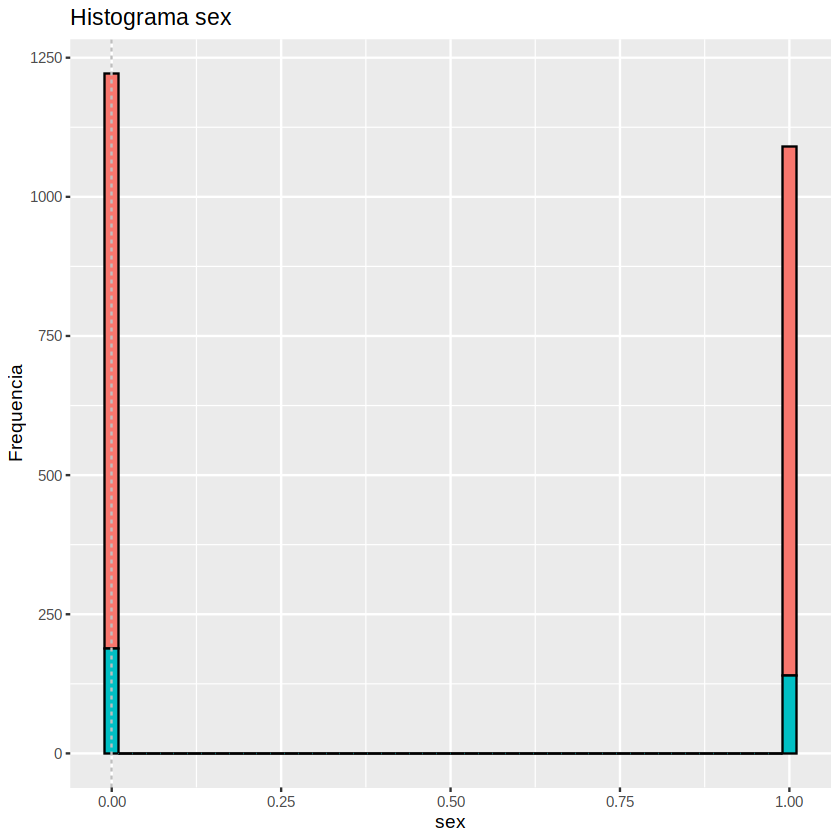

Warning message:
“Removed 287 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


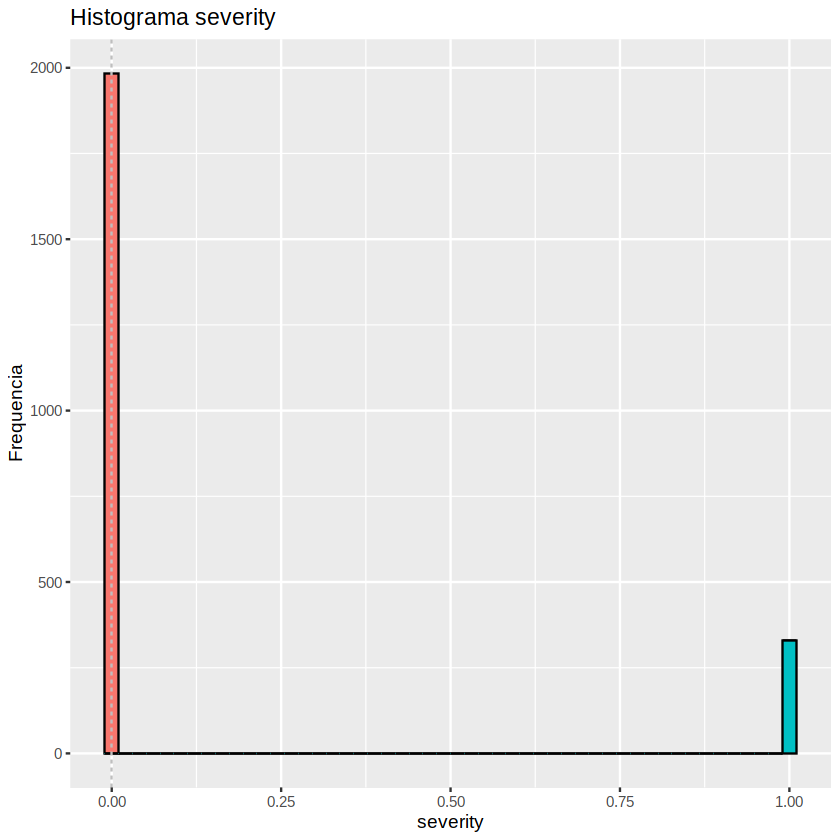

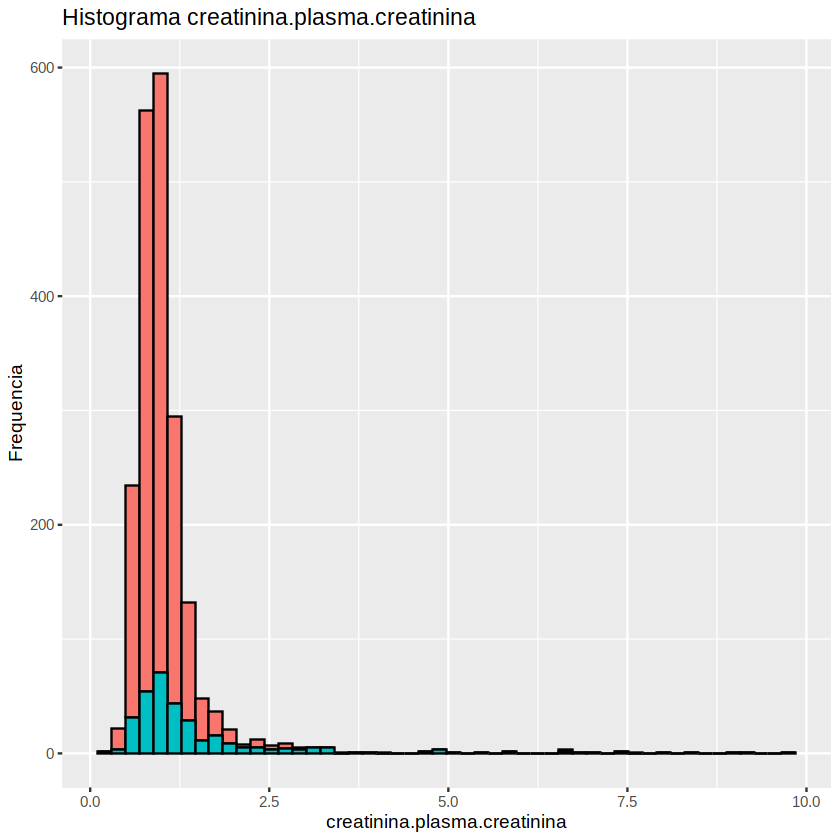

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


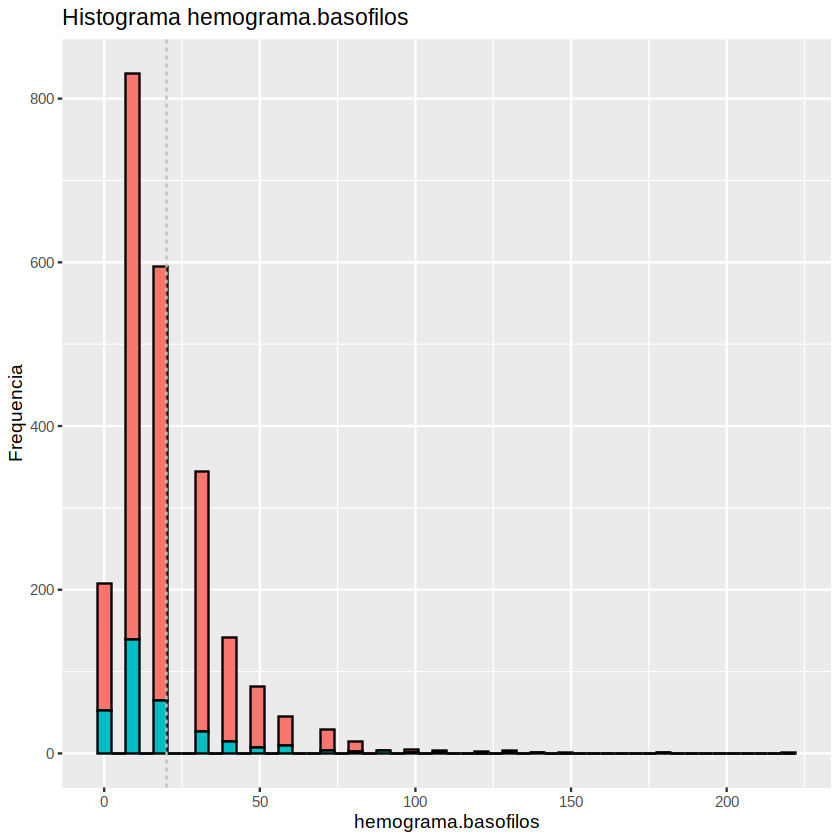

Warning message:
“Removed 15 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


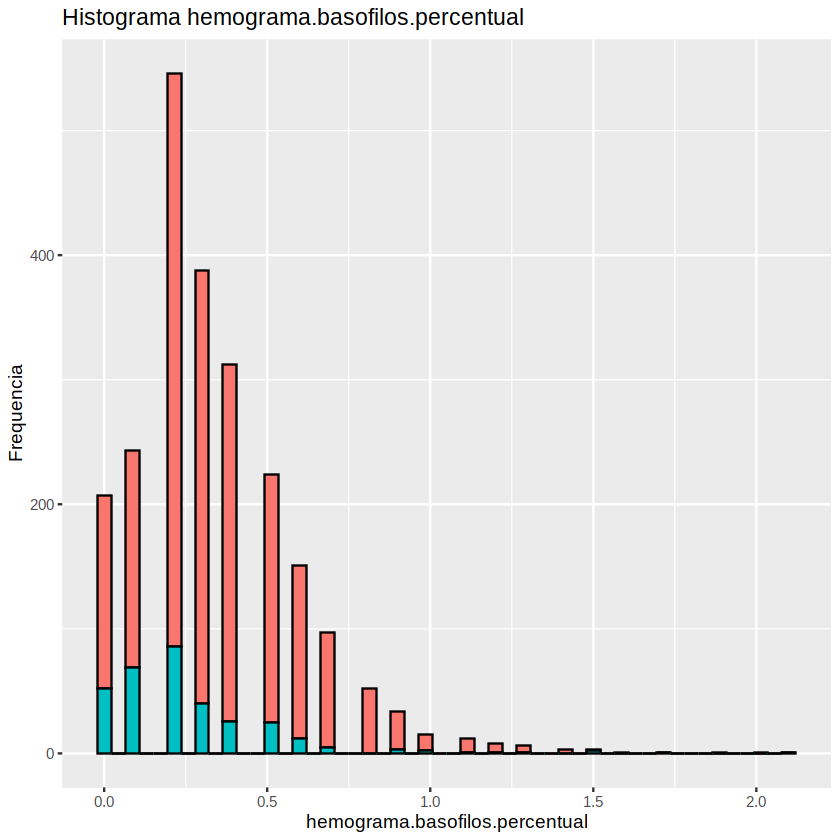

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


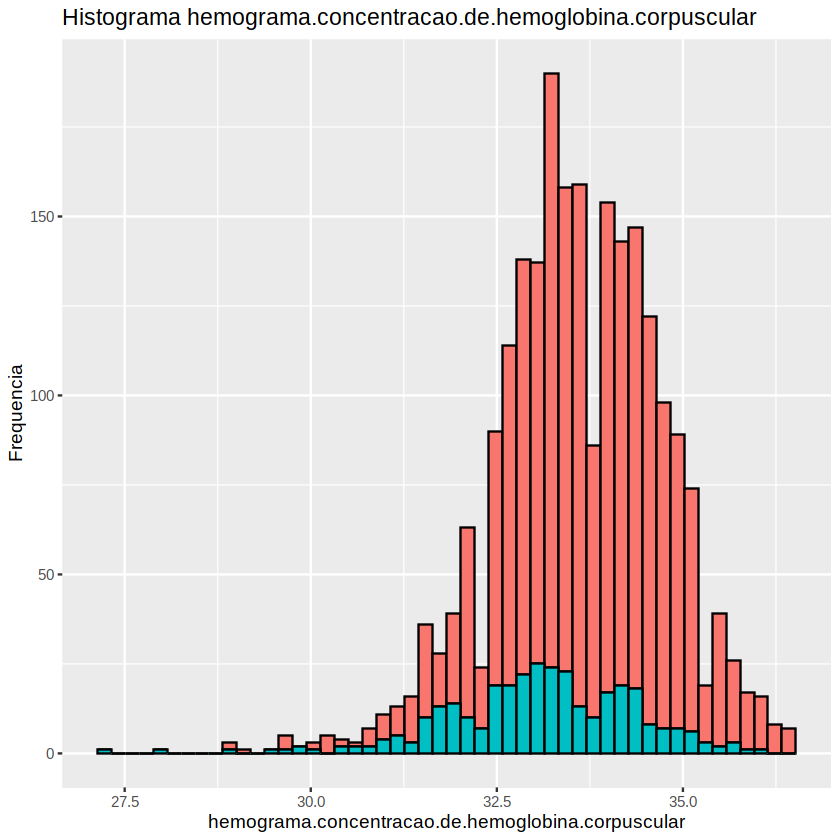

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


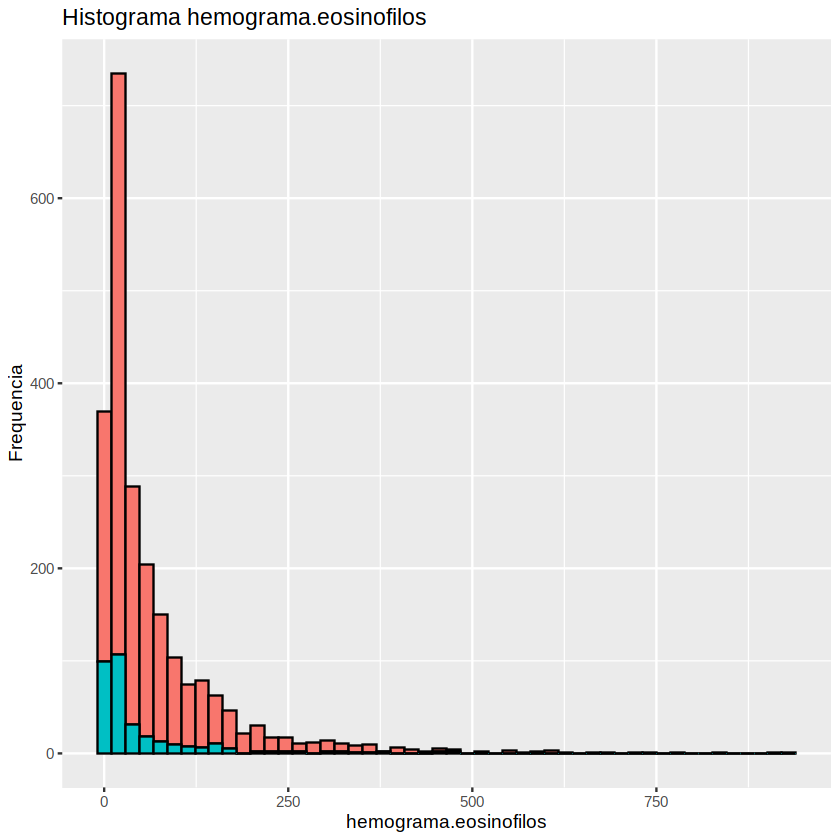

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


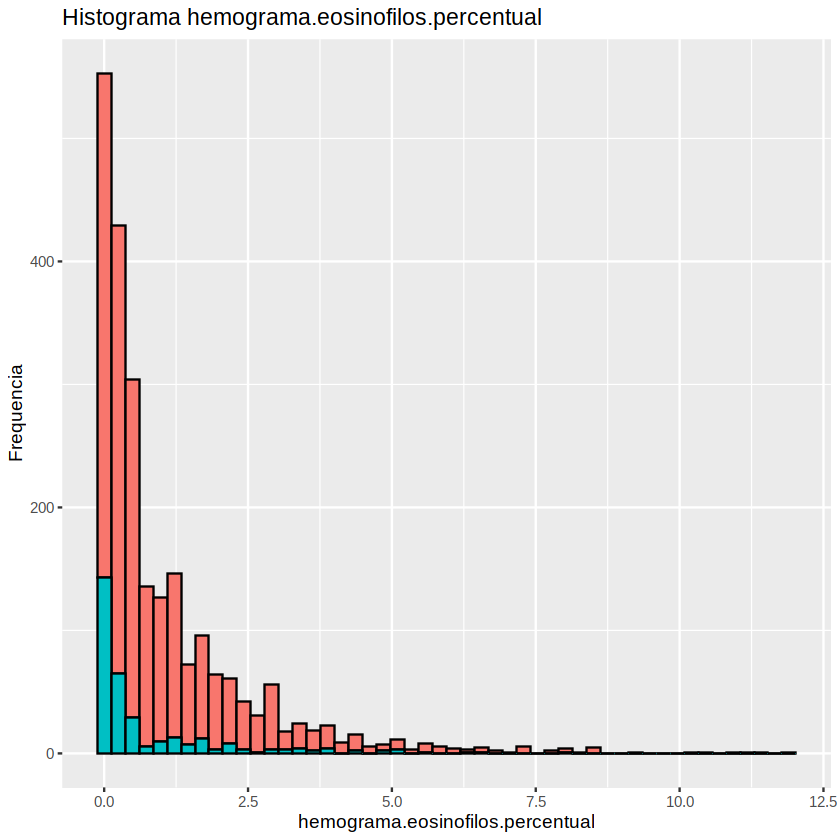

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


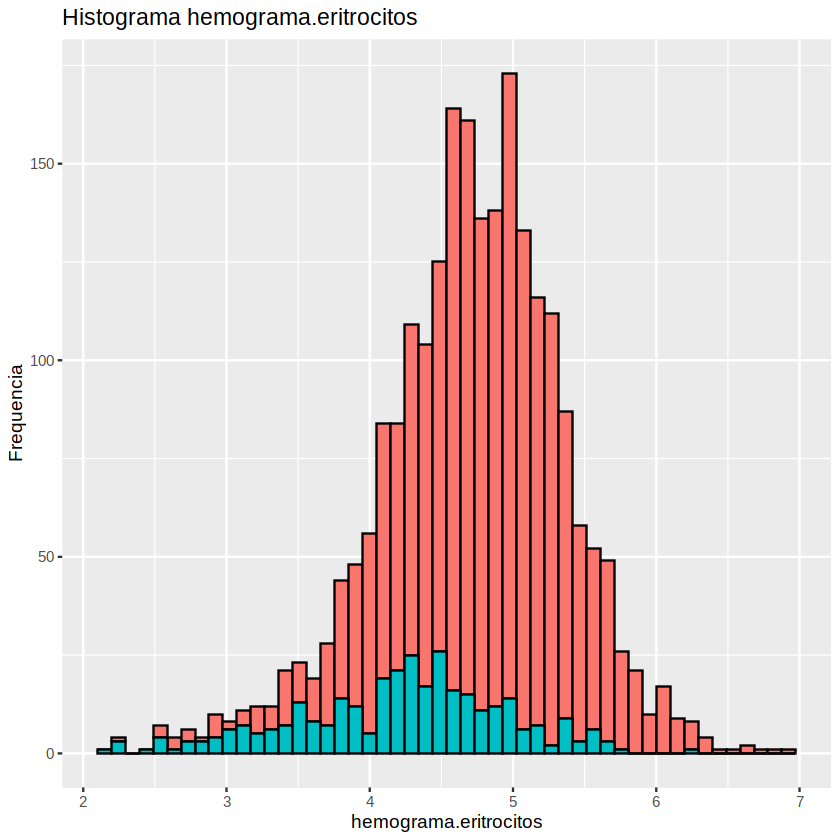

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


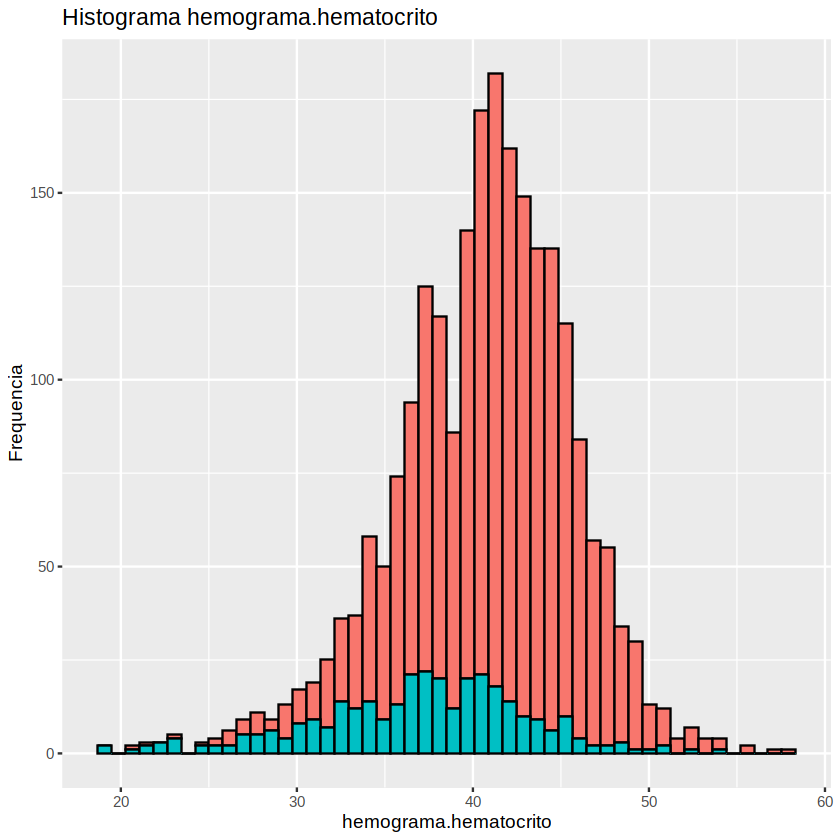

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


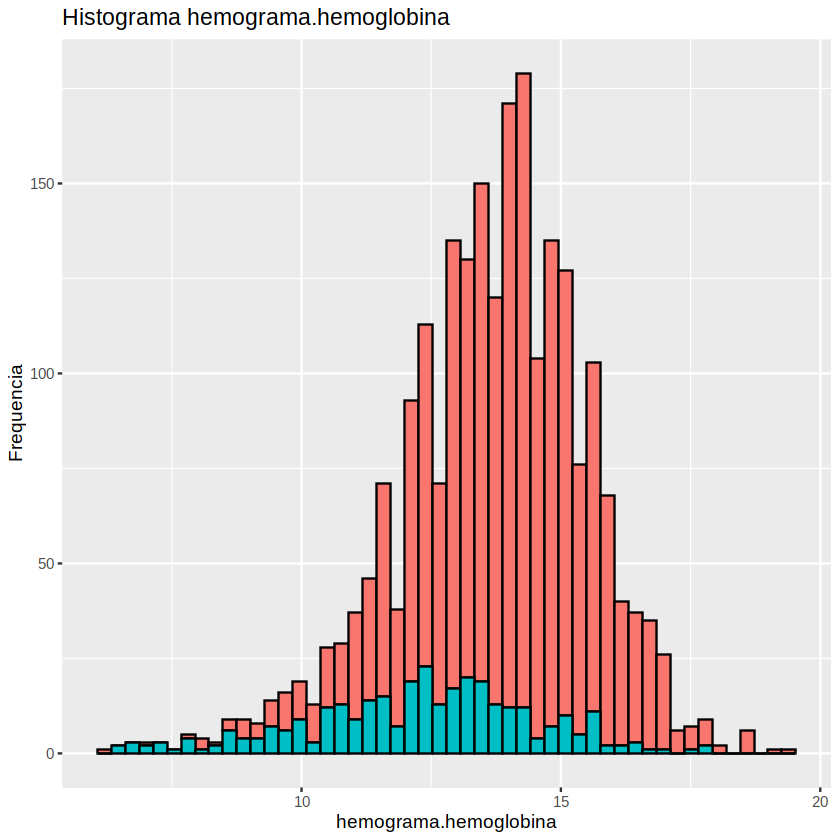

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


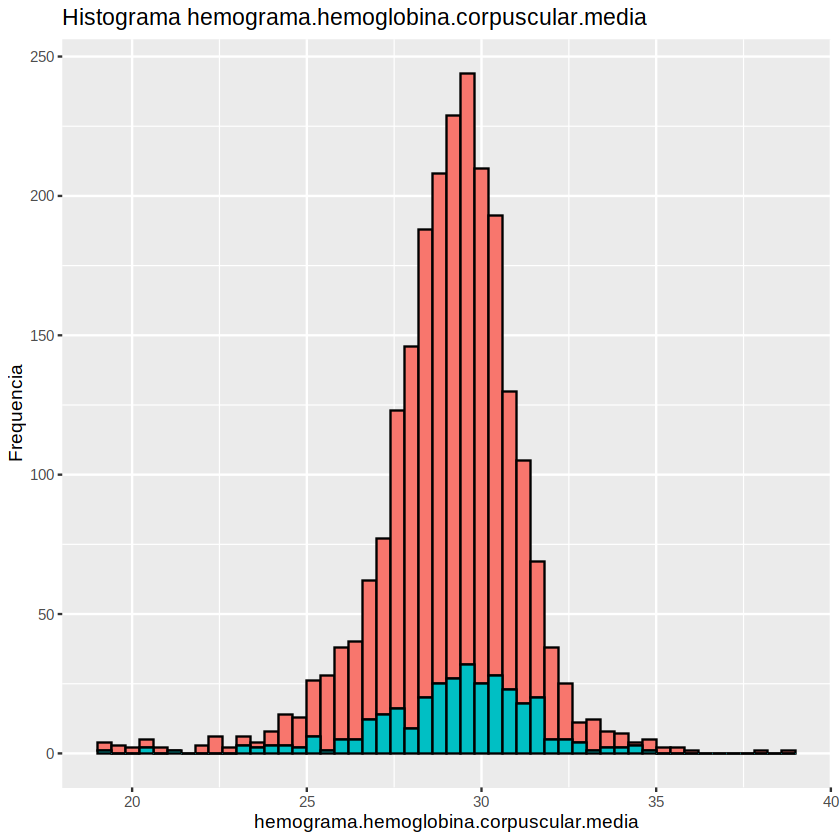

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


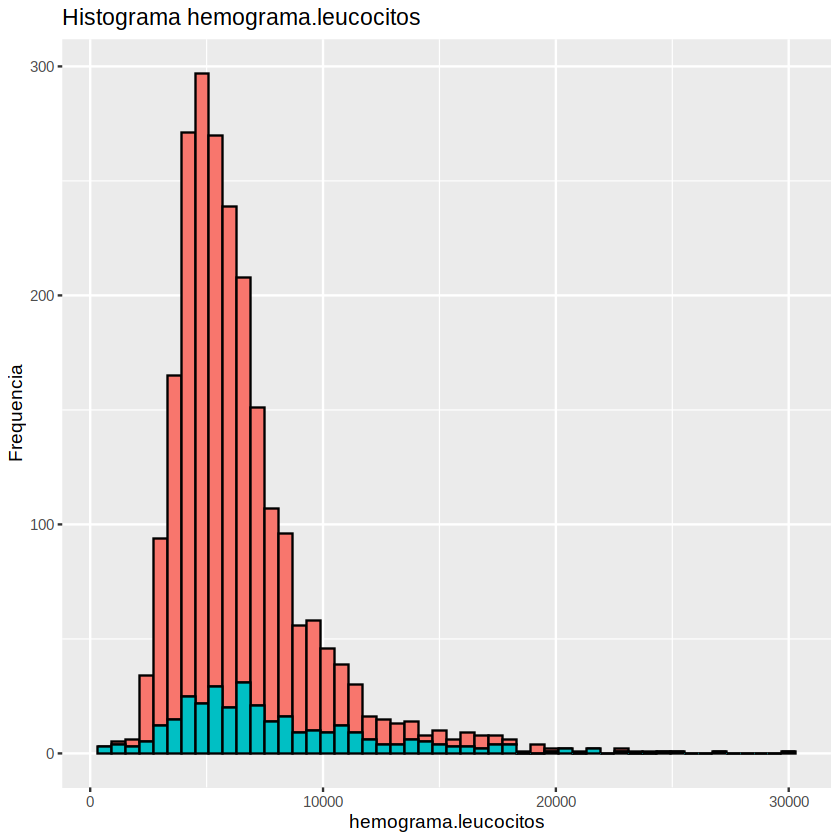

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


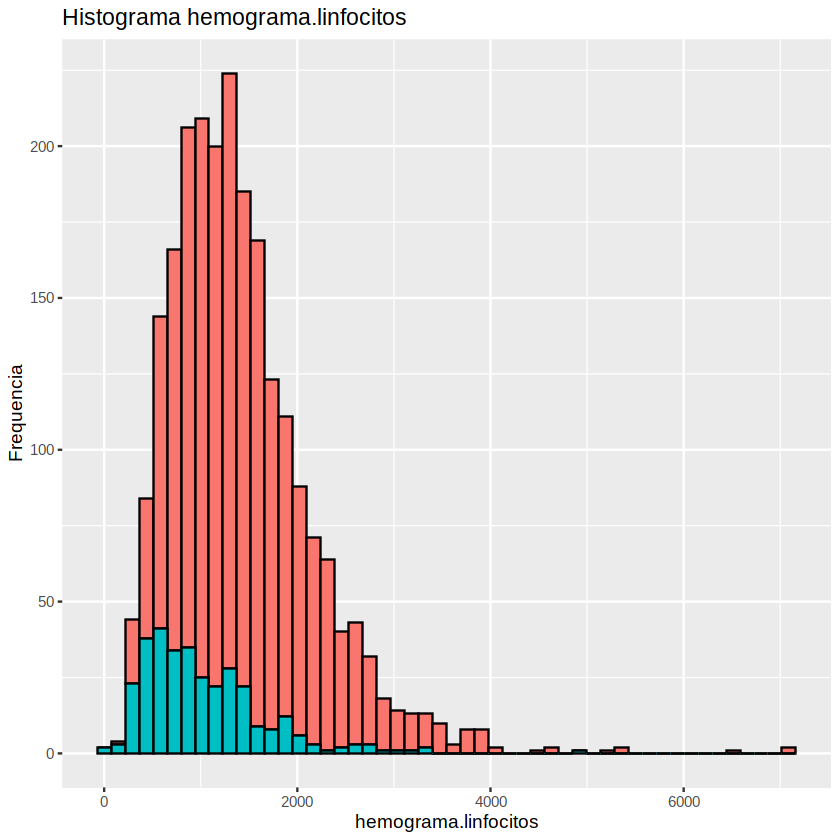

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


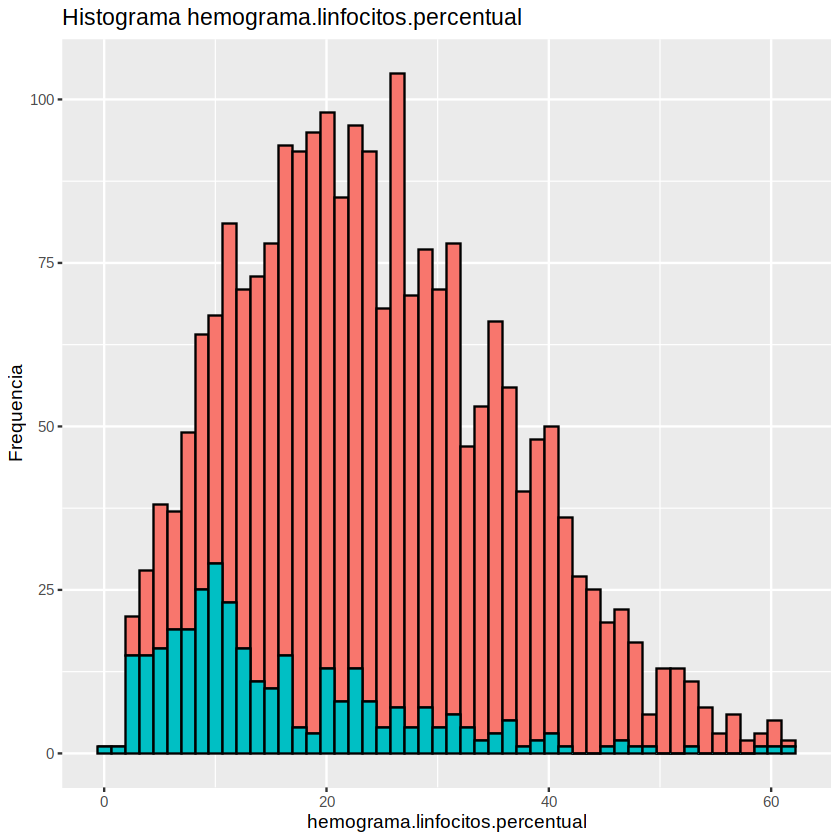

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


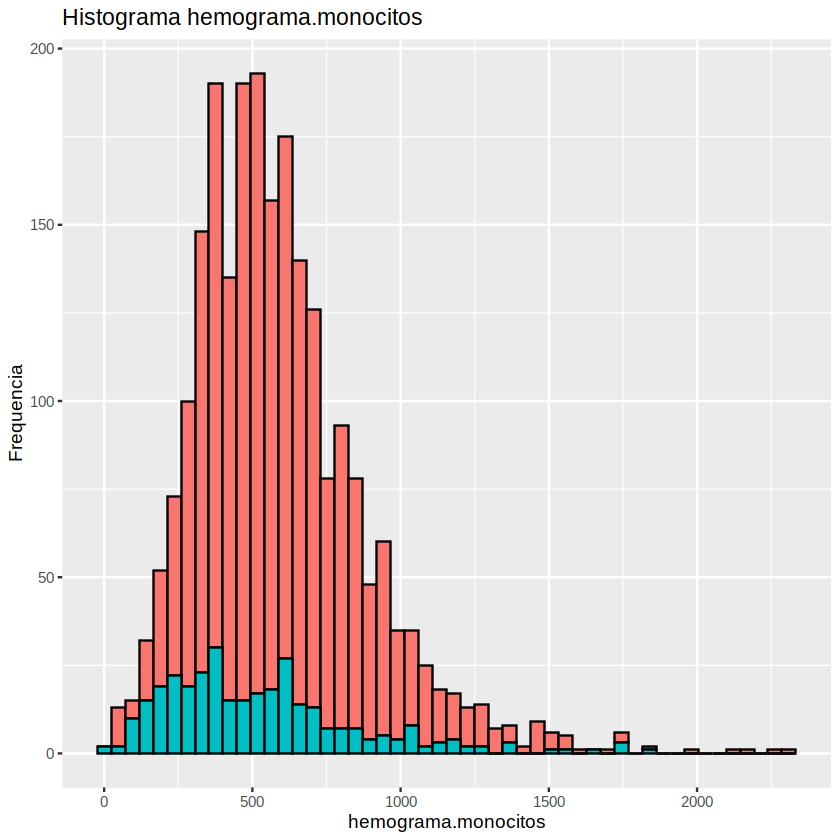

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


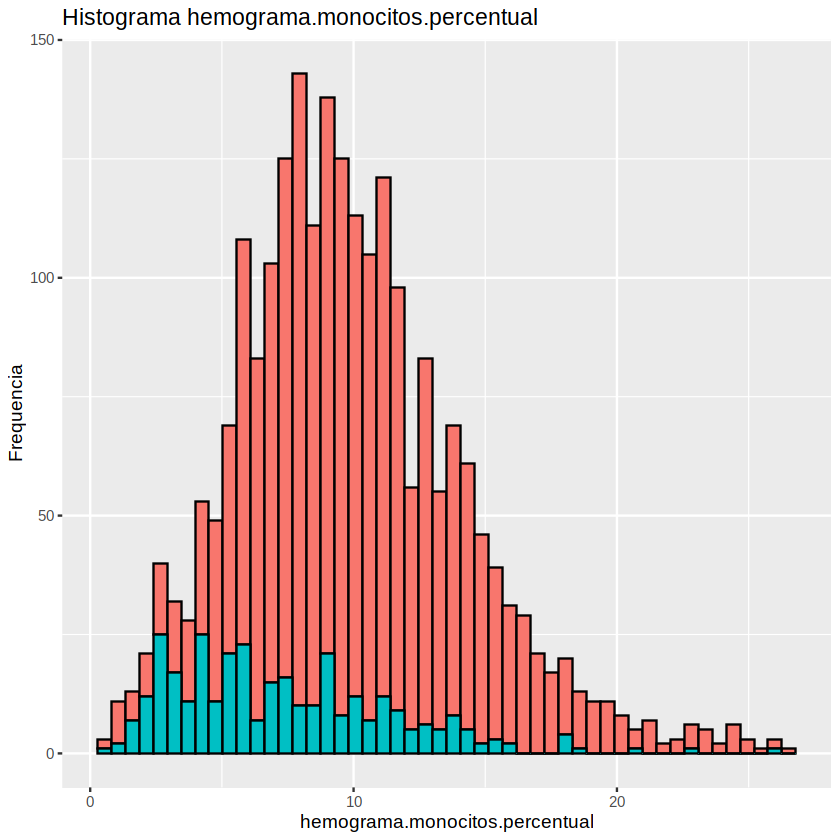

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


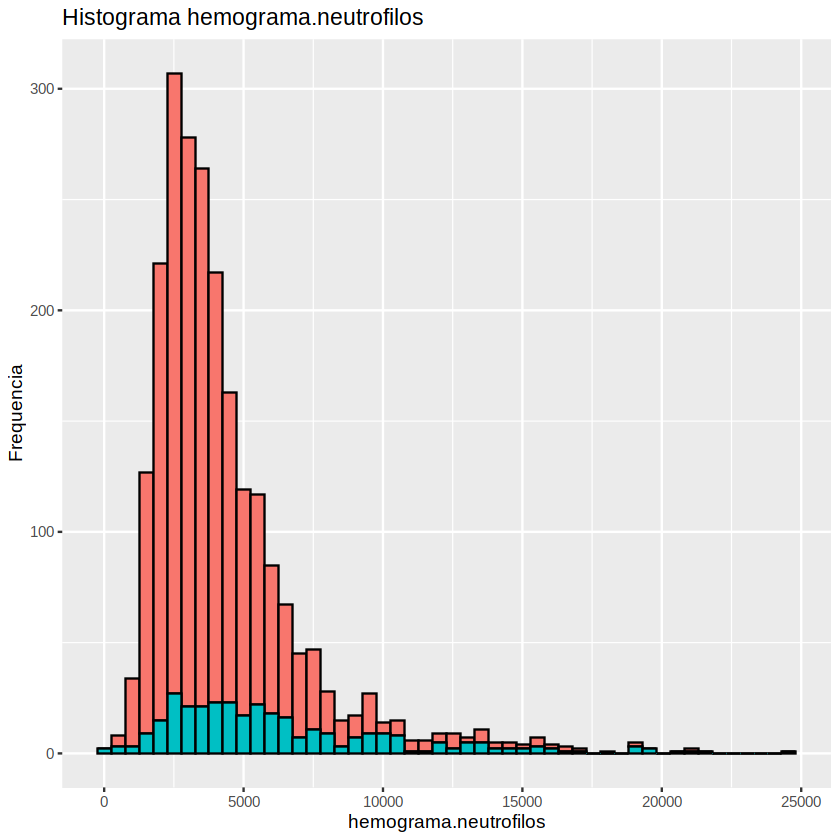

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


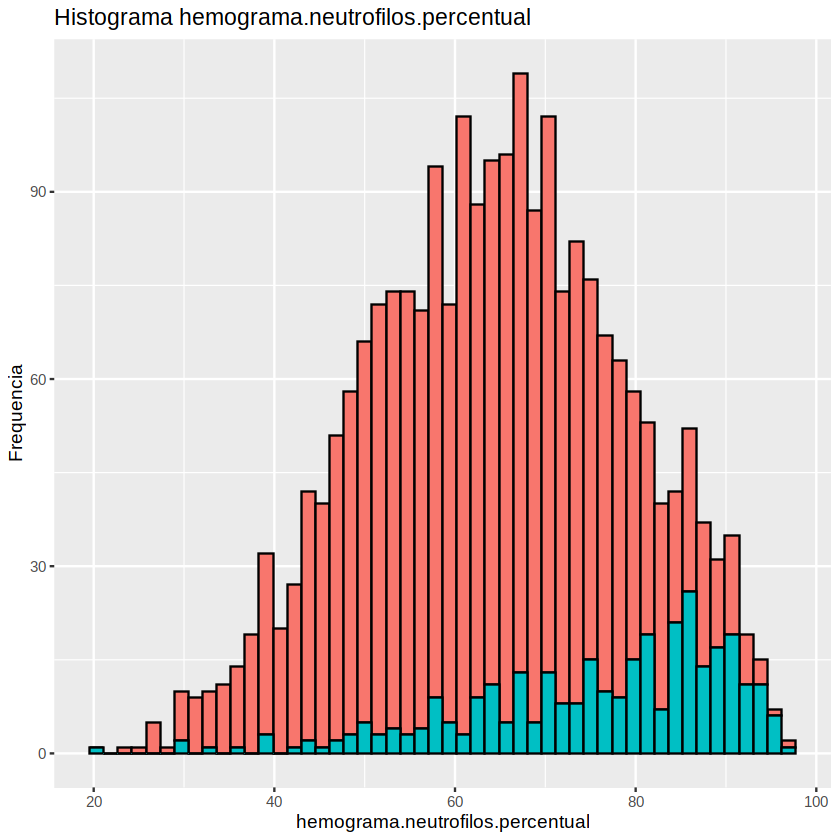

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


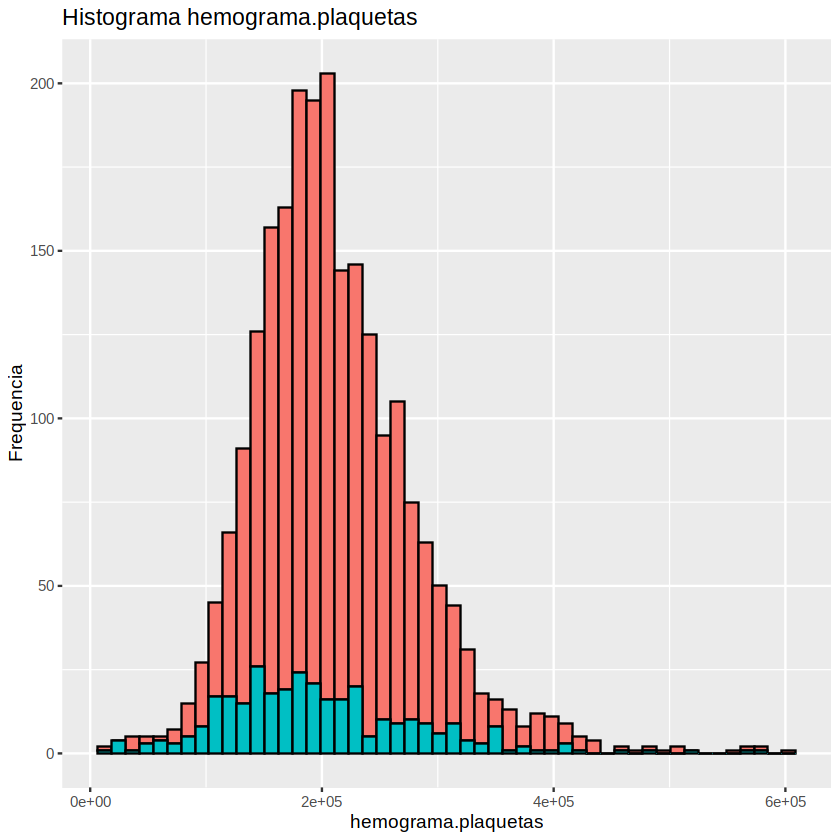

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


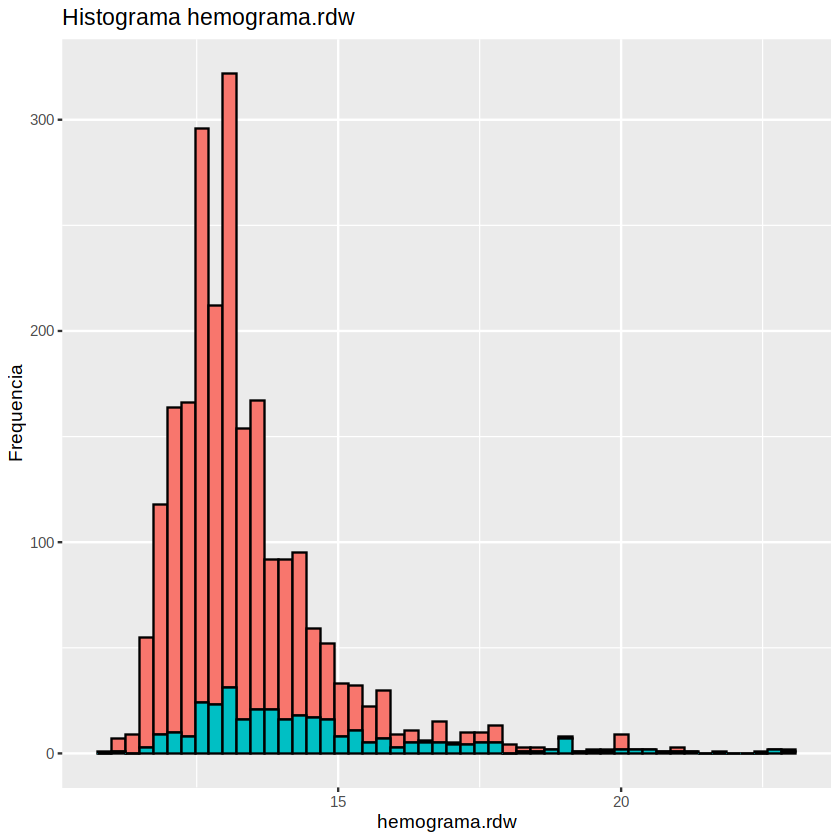

Warning message:
“Removed 51 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


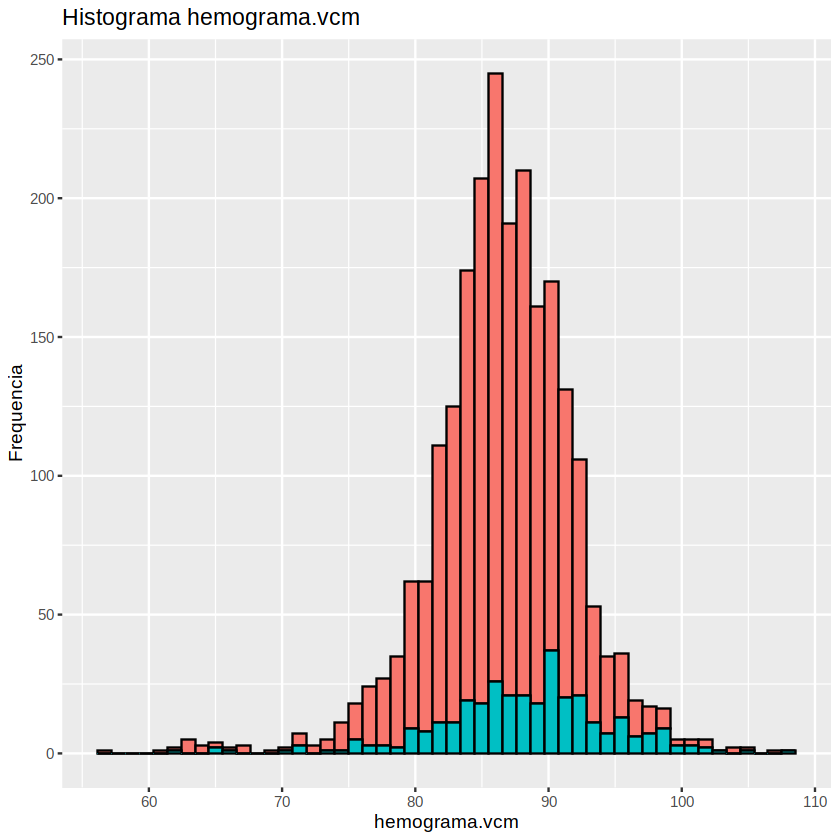

Warning message:
“Removed 539 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


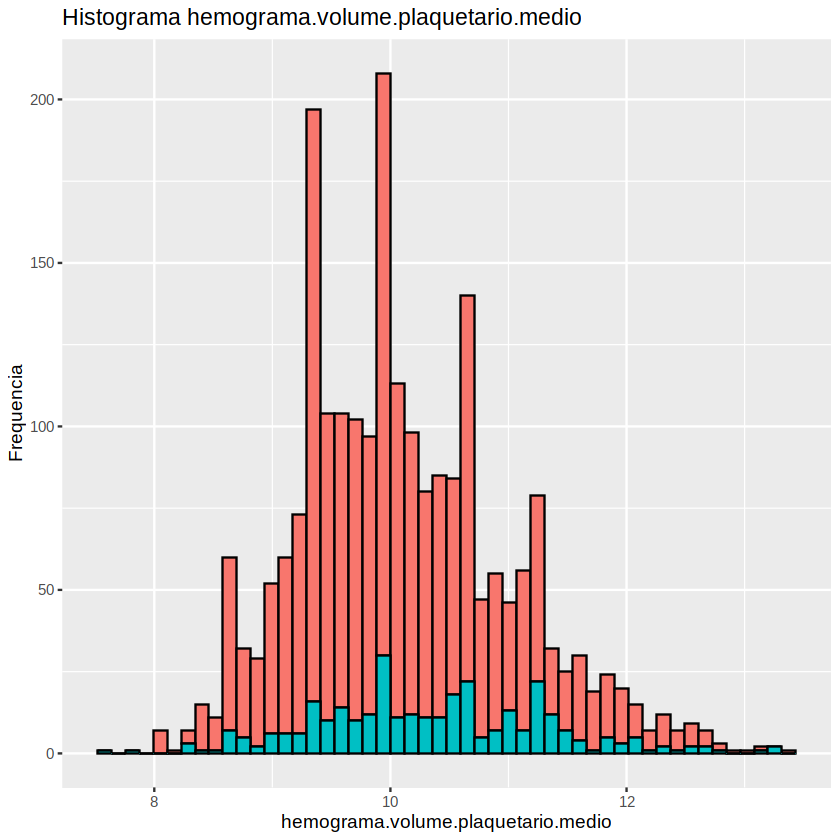

Warning message:
“Removed 86 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


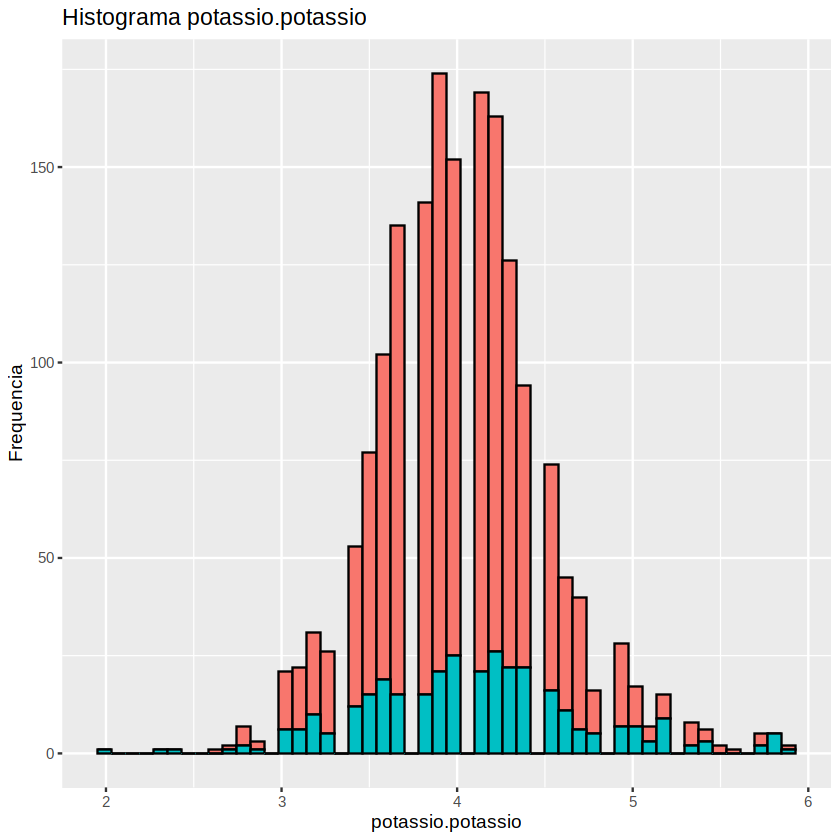

Warning message:
“Removed 540 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


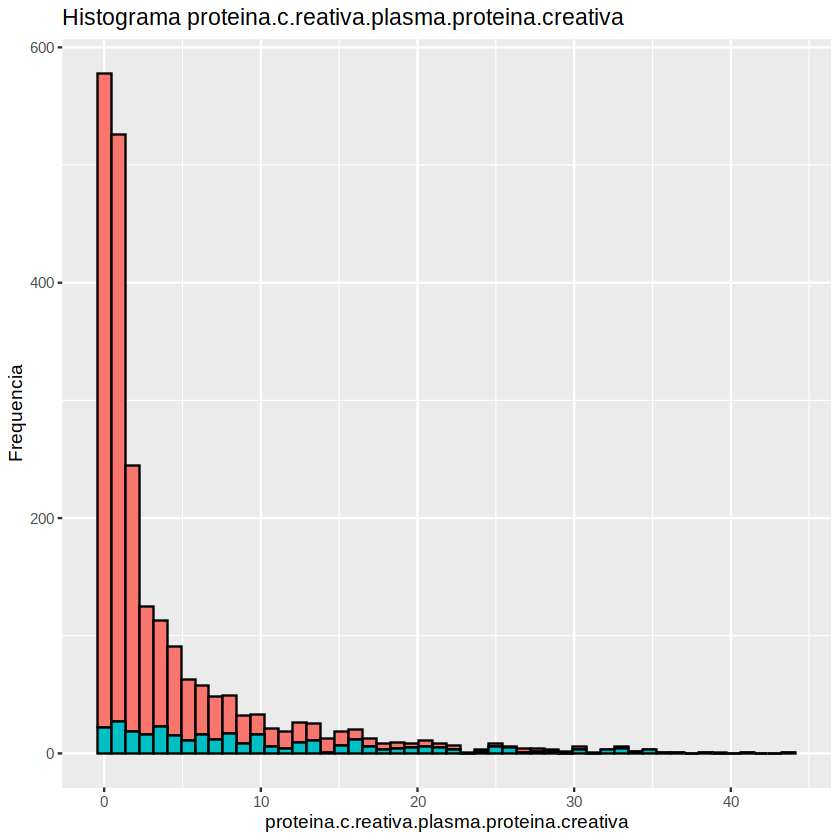

Warning message:
“Removed 316 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


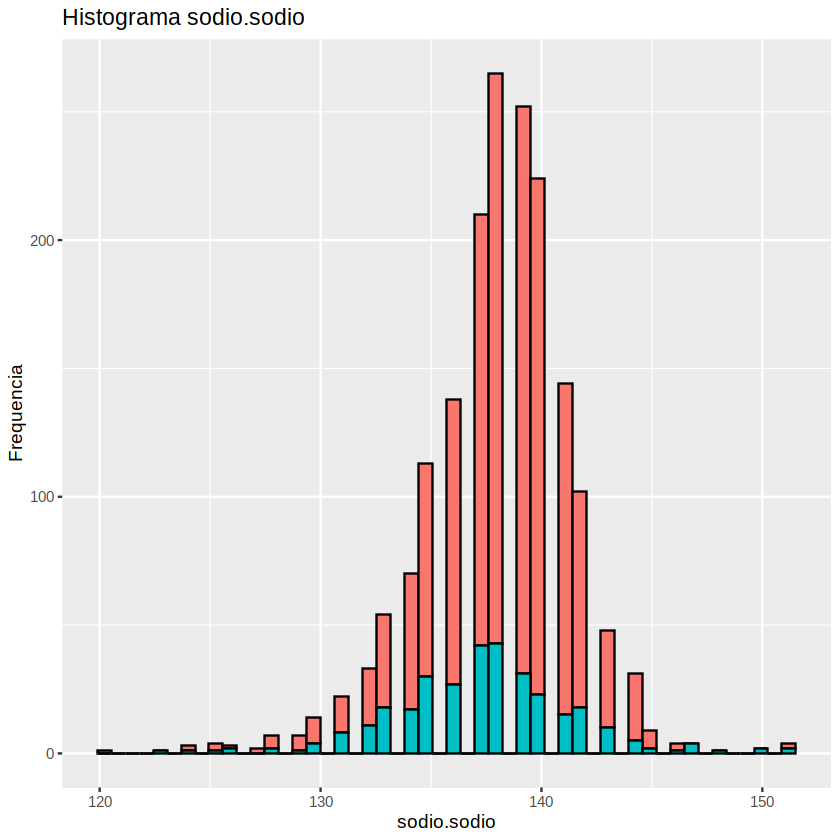

Warning message:
“Removed 998 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2312 rows containing missing values (geom_vline).”


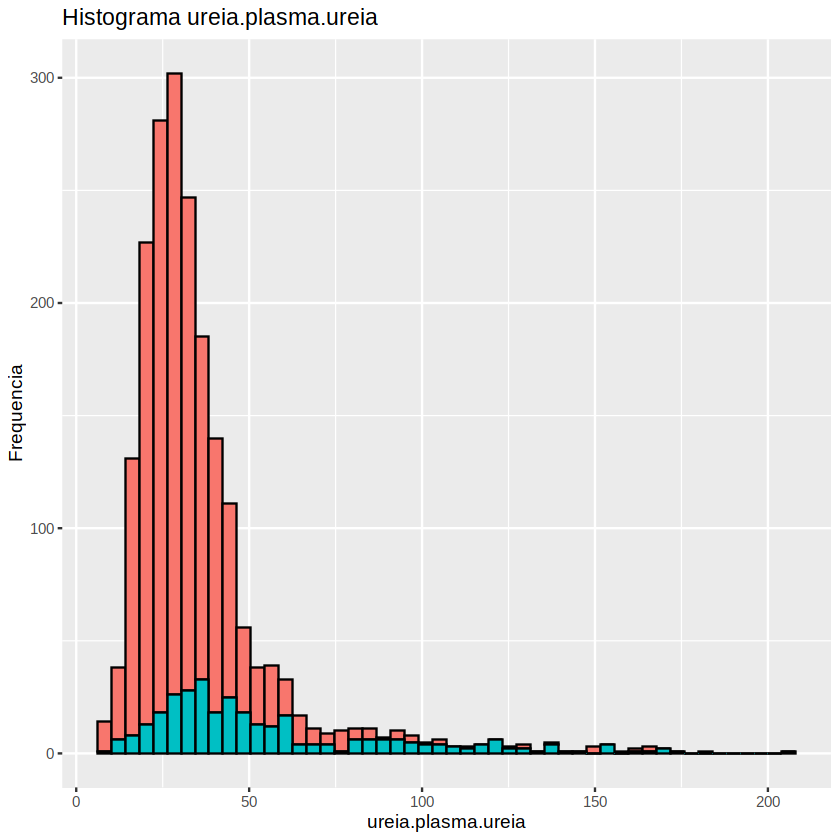

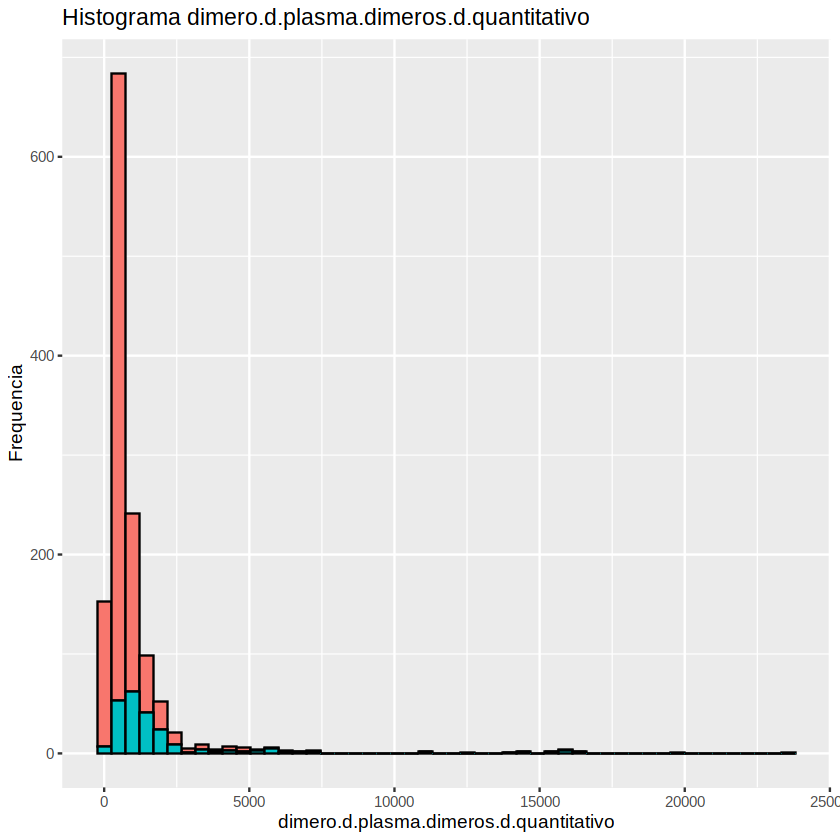

In [39]:
library(ggplot2)

for (i in (1:ncol(data))){

  label <- (data[i] %>% colnames)
  exame <- data %>% select(i) %>% as.list
  exame[[1]] -> exame
  His <- ggplot(data=data, 
  aes(x=exame))+
  geom_histogram(bins = 50, color="black", aes(fill=factor(severity))) +  
  xlab(label) +   ylab("Frequencia") +      
  theme(legend.position="none")+  ggtitle(paste("Histograma", label))+      
  geom_vline(data=data, aes(xintercept = median(exame)),linetype="dashed",color="grey")
  show(His)
}

In [40]:
#dimensions
data %>% dim

#check class numbers
data %>% count(severity)

#check column names
data %>% colnames

#move the target feature 
data %>% select(severity) -> severity
data %>% select(-severity) -> dado
cbind(dado,severity) -> data

#check column names
data %>% colnames

[1] 2312   28

severity,n
<dbl>,<int>
0,1984
1,328


[1] "sex"                                              
 [2] "severity"                                         
 [3] "creatinina.plasma.creatinina"                     
 [4] "hemograma.basofilos"                              
 [5] "hemograma.basofilos.percentual"                   
 [6] "hemograma.concentracao.de.hemoglobina.corpuscular"
 [7] "hemograma.eosinofilos"                            
 [8] "hemograma.eosinofilos.percentual"                 
 [9] "hemograma.eritrocitos"                            
[10] "hemograma.hematocrito"                            
[11] "hemograma.hemoglobina"                            
[12] "hemograma.hemoglobina.corpuscular.media"          
[13] "hemograma.leucocitos"                             
[14] "hemograma.linfocitos"                             
[15] "hemograma.linfocitos.percentual"                  
[16] "hemograma.monocitos"                              
[17] "hemograma.monocitos.percentual"                   
[18] "hemograma.neutrofilos"                            
[19] "hemograma.neutrofilos.percentual"                 
[20] "hemograma.plaquetas"                              
[21] "hemograma.rdw"                                    
[22] "hemograma.vcm"                                    
[23] "hemograma.volume.plaquetario.medio"               
[24] "potassio.potassio"                                
[25] "proteina.c.reativa.plasma.proteina.creativa"      
[26] "sodio.sodio"                                      
[27] "ureia.plasma.ureia"                               
[28] "dimero.d.plasma.dimeros.d.quantitativo"

[1] "sex"                                              
 [2] "creatinina.plasma.creatinina"                     
 [3] "hemograma.basofilos"                              
 [4] "hemograma.basofilos.percentual"                   
 [5] "hemograma.concentracao.de.hemoglobina.corpuscular"
 [6] "hemograma.eosinofilos"                            
 [7] "hemograma.eosinofilos.percentual"                 
 [8] "hemograma.eritrocitos"                            
 [9] "hemograma.hematocrito"                            
[10] "hemograma.hemoglobina"                            
[11] "hemograma.hemoglobina.corpuscular.media"          
[12] "hemograma.leucocitos"                             
[13] "hemograma.linfocitos"                             
[14] "hemograma.linfocitos.percentual"                  
[15] "hemograma.monocitos"                              
[16] "hemograma.monocitos.percentual"                   
[17] "hemograma.neutrofilos"                            
[18] "hemograma.neutrofilos.percentual"                 
[19] "hemograma.plaquetas"                              
[20] "hemograma.rdw"                                    
[21] "hemograma.vcm"                                    
[22] "hemograma.volume.plaquetario.medio"               
[23] "potassio.potassio"                                
[24] "proteina.c.reativa.plasma.proteina.creativa"      
[25] "sodio.sodio"                                      
[26] "ureia.plasma.ureia"                               
[27] "dimero.d.plasma.dimeros.d.quantitativo"           
[28] "severity"

In [41]:
#rename features
names(data) <- c( 'Sex','Creatinine','Basophils',
                 'Basophils(%)','CHC', 'Eosinophils',
                 'Eosinophils(%)',
                 'Erythrocytes','Hematocrits','Hemoglobin',
                 'MCH','Leukocytes','Lymphocytes',
                 'Lymphocytes(%)','Monocytes','Monocytes(%)',
                 'Neutrophils','Neutrophils(%)','Platelet count',
                 'RDW','MCV','MPV',
                 'Potassium','C-reative protein','Sodium',
                 'Urea','D-dimers','Severity')

In [42]:
#write a csv
data %>% write_csv('hosp2_ai4h.csv')

In [43]:
#check NAs percentage in each column
colMeans(is.na(data)) %>% as.data.frame

,.
,<dbl>
Sex,0.000000000
Creatinine,0.124134948
Basophils,0.000000000
Basophils(%),0.002595156
CHC,0.006487889
Eosinophils,0.001730104
Eosinophils(%),0.002595156
Erythrocytes,0.002595156
Hematocrits,0.002595156


In [44]:
#summary sex
data %>% count(Sex)

Sex,n
<dbl>,<int>
0,1222
1,1090


In [45]:
#check colnames
data %>% colnames

[1] "Sex"               "Creatinine"        "Basophils"        
 [4] "Basophils(%)"      "CHC"               "Eosinophils"      
 [7] "Eosinophils(%)"    "Erythrocytes"      "Hematocrits"      
[10] "Hemoglobin"        "MCH"               "Leukocytes"       
[13] "Lymphocytes"       "Lymphocytes(%)"    "Monocytes"        
[16] "Monocytes(%)"      "Neutrophils"       "Neutrophils(%)"   
[19] "Platelet count"    "RDW"               "MCV"              
[22] "MPV"               "Potassium"         "C-reative protein"
[25] "Sodium"            "Urea"              "D-dimers"         
[28] "Severity"